In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import iris

In [2]:
from climtas.nci import GadiClient
client = GadiClient()
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39283 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/39283/status,
Dashboard: /proxy/39283/status,Workers: 4
Total threads: 4,Total memory: 18.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45455,Workers: 4
Dashboard: /proxy/39283/status,Total threads: 4
Started: Just now,Total memory: 18.00 GiB
Comm: tcp://127.0.0.1:40379,Total threads: 1
Dashboard: /proxy/38873/status,Memory: 4.50 GiB
Nanny: tcp://127.0.0.1:33807,


In [3]:
def load_access_rns(fname,var_name):

    data = iris.load(fname, var_name)                  
    data_da = xr.DataArray.from_iris(data[0])

    return data_da

fnames = ["/g/data/gb02/ab4502/access_rns/20240128T0000Z/Gippsland/d0198/RAL3P2/um/umnsaa_pb000",
          "/g/data/gb02/ab4502/access_rns/20240128T0000Z/Gippsland/d0198/RAL3P2/um/umnsaa_pb012",
          "/g/data/gb02/ab4502/access_rns/20240129T0000Z/Gippsland/d0198/RAL3P2/um/umnsaa_pb000",
          "/g/data/gb02/ab4502/access_rns/20240129T0000Z/Gippsland/d0198/RAL3P2/um/umnsaa_pb012"]
var_name = "air_pressure_at_sea_level"
pres_0198 = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

fnames = ["/g/data/gb02/ab4502/access_rns/20240128T0000Z/Gippsland/d0198/RAL3P2/um/umnsaa_pvera000",
          "/g/data/gb02/ab4502/access_rns/20240128T0000Z/Gippsland/d0198/RAL3P2/um/umnsaa_pvera012",
          "/g/data/gb02/ab4502/access_rns/20240129T0000Z/Gippsland/d0198/RAL3P2/um/umnsaa_pvera000",
          "/g/data/gb02/ab4502/access_rns/20240129T0000Z/Gippsland/d0198/RAL3P2/um/umnsaa_pvera012"]
var_name = "x_wind"
u_ds_0198 = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

var_name = "y_wind"
v_ds_0198 = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

wind_ds_0198 = xr.Dataset({"u":u_ds_0198,"v":v_ds_0198})

In [6]:
fnames = ["/scratch/gb02/ab4502/cylc-run/u-dg768/share/cycle/20240128T0000Z/Gippsland2/d0100/RAL3P2/um/umnsaa_pb000",
          "/scratch/gb02/ab4502/cylc-run/u-dg768/share/cycle/20240128T0000Z/Gippsland2/d0100/RAL3P2/um/umnsaa_pb012",
          "/scratch/gb02/ab4502/cylc-run/u-dg768/share/cycle/20240129T0000Z/Gippsland2/d0100/RAL3P2/um/umnsaa_pb000",
          "/scratch/gb02/ab4502/cylc-run/u-dg768/share/cycle/20240129T0000Z/Gippsland2/d0100/RAL3P2/um/umnsaa_pb012"]
var_name = "air_pressure_at_sea_level"
pres_0100 = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

fnames = ["/scratch/gb02/ab4502/cylc-run/u-dg768/share/cycle/20240128T0000Z/Gippsland2/d0100/RAL3P2/um/umnsaa_pvera000",
          "/scratch/gb02/ab4502/cylc-run/u-dg768/share/cycle/20240128T0000Z/Gippsland2/d0100/RAL3P2/um/umnsaa_pvera012",
          "/scratch/gb02/ab4502/cylc-run/u-dg768/share/cycle/20240129T0000Z/Gippsland2/d0100/RAL3P2/um/umnsaa_pvera000",
          "/scratch/gb02/ab4502/cylc-run/u-dg768/share/cycle/20240129T0000Z/Gippsland2/d0100/RAL3P2/um/umnsaa_pvera012"]
var_name = "x_wind"
u_ds_0100 = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

var_name = "y_wind"
v_ds_0100 = xr.concat([load_access_rns(f,var_name) for f in fnames],dim="time")

wind_ds_0100 = xr.Dataset({"u":u_ds_0100,"v":v_ds_0100})

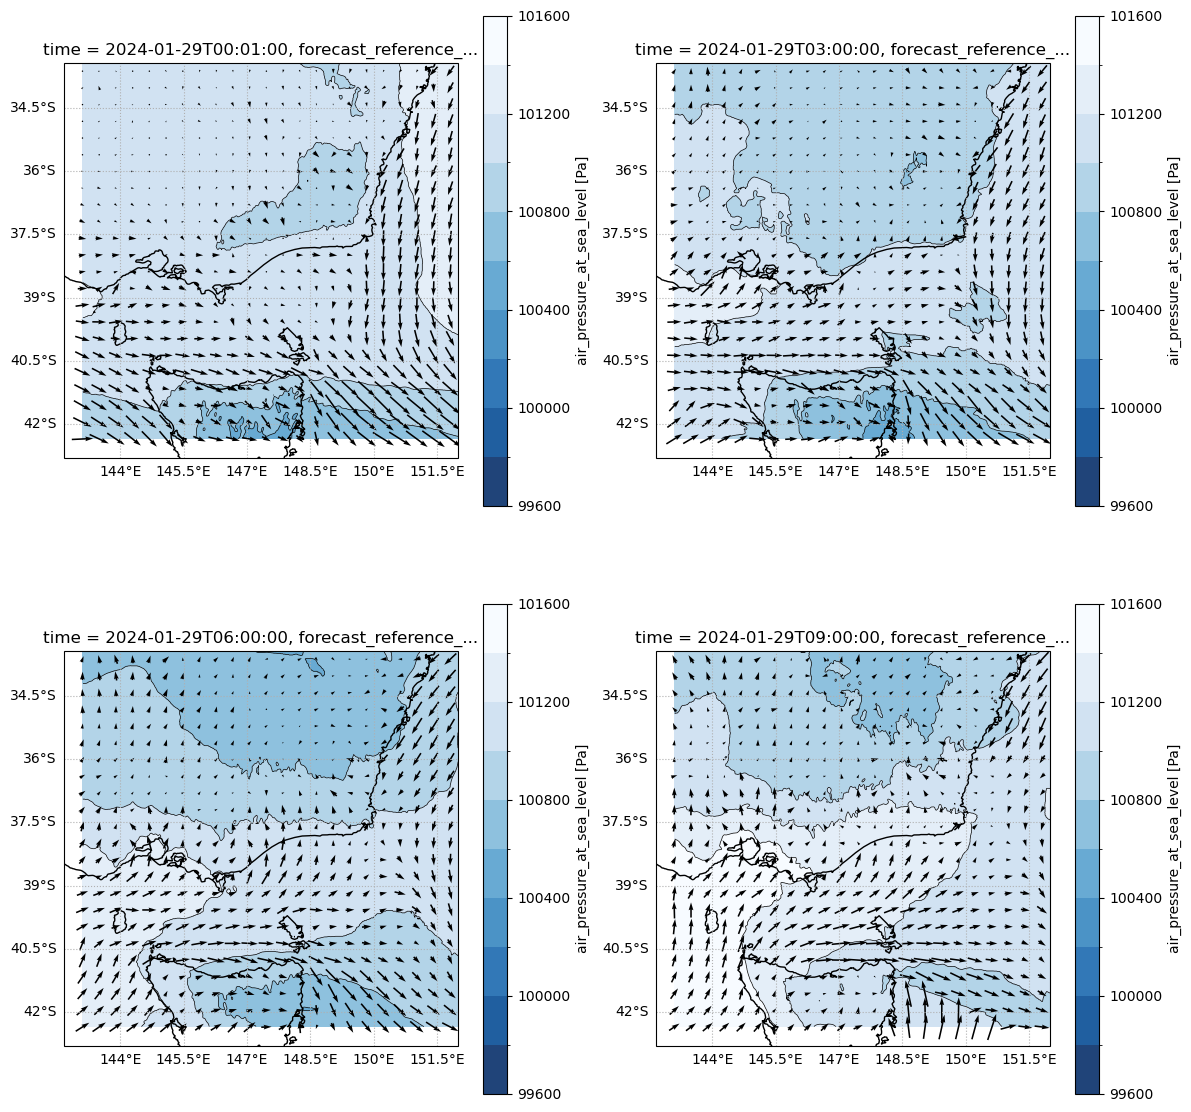

In [8]:
step=20
p_levs = np.linspace(996,1016,11)*100
plt.figure(figsize=[14,14])

for time, pos in zip(["2024-01-29 00:01","2024-01-29 03:00","2024-01-29 06:00","2024-01-29 09:00"], [1,2,3,4]):
    ax = plt.subplot(2,2,pos,projection=ccrs.PlateCarree())
    xr.plot.contour(pres_0198.sel(time=time),colors=["k"],levels=p_levs,linewidths=[0.5])
    xr.plot.contourf(pres_0198.sel(time=time),cmap="Blues_r",alpha=0.9,levels=p_levs)
    ax.coastlines()
    ax.gridlines(draw_labels=["left","bottom"],ls=":")
    
    wind_ds_0198.sel(time=time).isel(latitude=slice(0,-1,step),longitude=slice(0,-1,step)).plot.quiver("longitude","latitude","u","v",width=0.004,color="k")

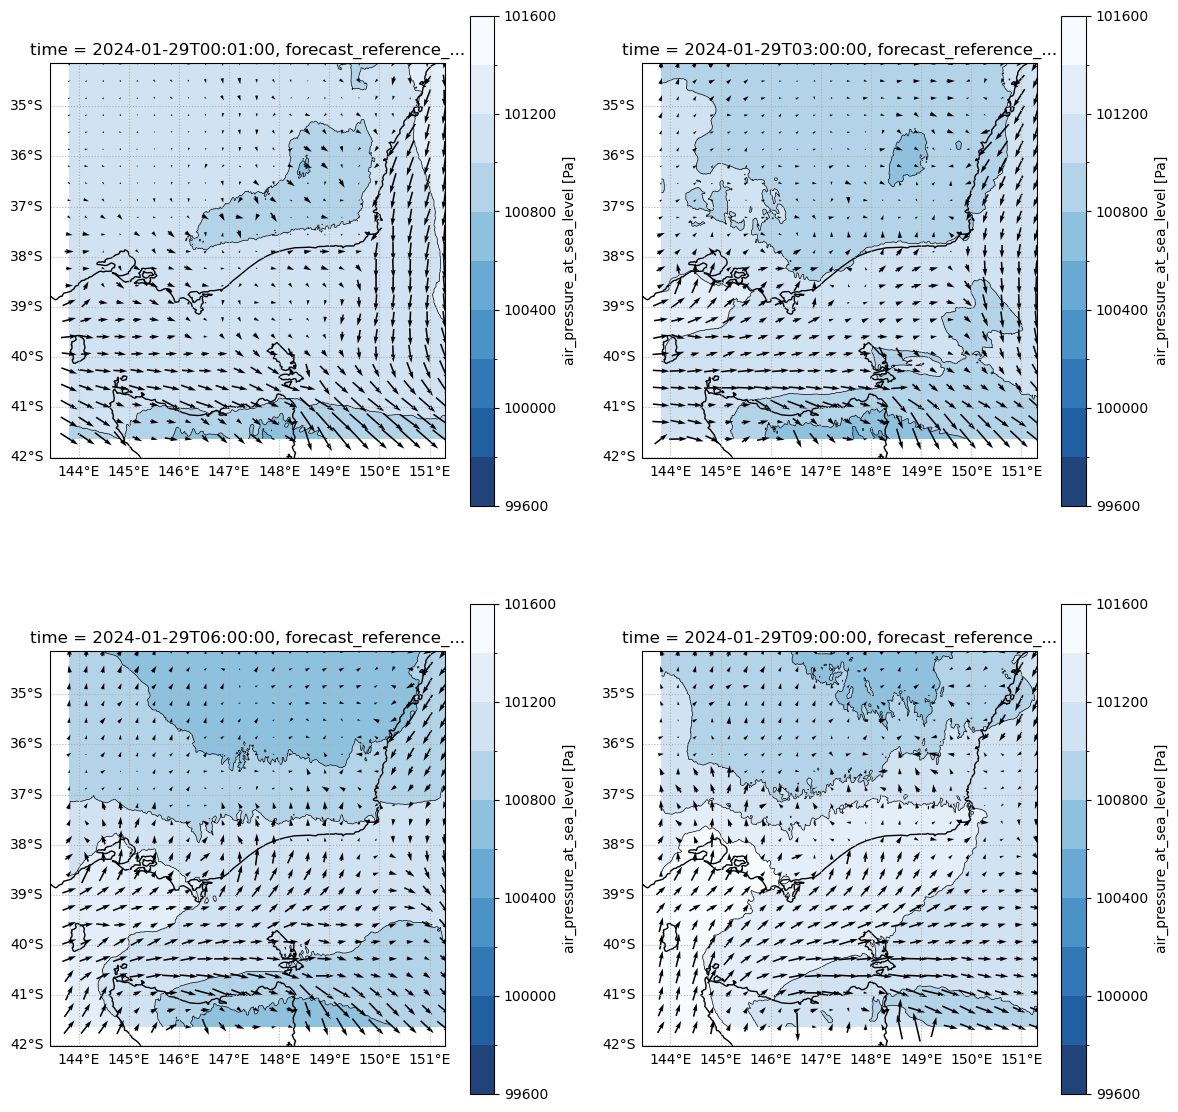

In [10]:
step=34
p_levs = np.linspace(996,1016,11)*100
plt.figure(figsize=[14,14])

for time, pos in zip(["2024-01-29 00:01","2024-01-29 03:00","2024-01-29 06:00","2024-01-29 09:00"], [1,2,3,4]):
    ax = plt.subplot(2,2,pos,projection=ccrs.PlateCarree())
    xr.plot.contour(pres_0100.sel(time=time),colors=["k"],levels=p_levs,linewidths=[0.5])
    xr.plot.contourf(pres_0100.sel(time=time),cmap="Blues_r",alpha=0.9,levels=p_levs)
    ax.coastlines()
    ax.gridlines(draw_labels=["left","bottom"],ls=":")
    
    wind_ds_0100.sel(time=time).isel(latitude=slice(0,-1,step),longitude=slice(0,-1,step)).plot.quiver("longitude","latitude","u","v",width=0.004,color="k")

Text(0.5, 1.0, '')

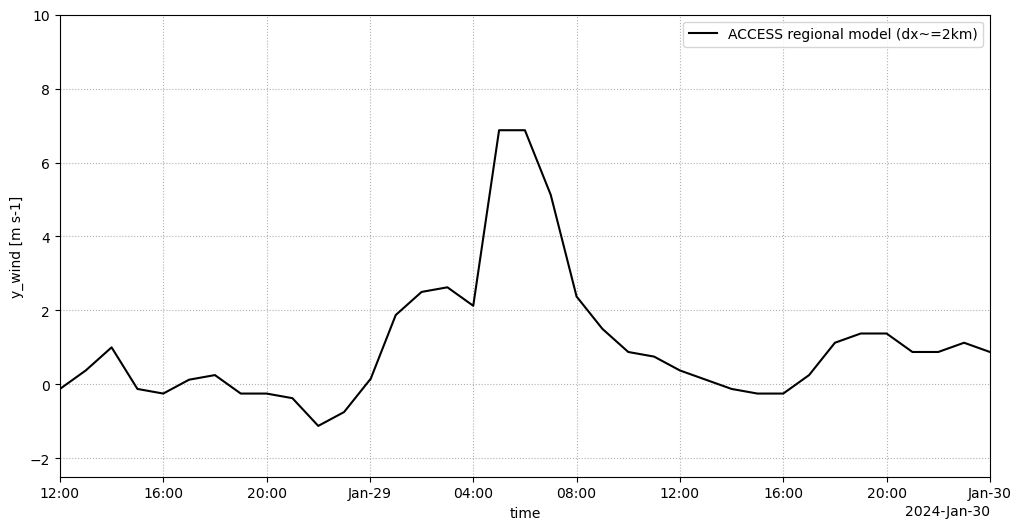

In [20]:
plt.figure(figsize=[12,6])

qlat = -37.881802
qlon = 147.566895
#wind_ds_0100.sel(latitude=qlat,longitude=qlon,method="nearest").v.plot(label="d0100",color="k",ls="-")
wind_ds_0198.sel(latitude=qlat,longitude=qlon,method="nearest").v.plot(label="ACCESS regional model (dx~=2km)",color="k",ls="-")
plt.legend()


plt.xlim([pd.to_datetime("2024-01-28 12:00"),pd.to_datetime("2024-01-30 00:00")])
plt.ylim([-2.5,10])
plt.grid(ls=":")
plt.title("")